In [ ]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
import time 
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data= pd.read_csv("/content/gdrive/My Drive/Project/HomeC.csv",low_memory=False)
data = data[:-1] #delete last row  (NaNs)
df=data.copy()

In [ ]:
df.shape

(503910, 32)

In [ ]:
df.head(5)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503910 entries, 0 to 503909
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [ ]:
df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [ ]:
df.shape

(503910, 32)

In [ ]:
#Convert Unix timestamp to datetime, use sample frequency of minutes and make it dataframe index
df['time'] = pd.to_datetime(df['time'], unit='s')
df['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min'))
df = df.set_index('time')

In [ ]:
df.columns = [i.replace(' [kW]', '') for i in df.columns]
df['Furnace'] = df[['Furnace 1','Furnace 2']].sum(axis=1)
df['Kitchen'] = df[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1) #We could also use the mean 
df.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38','icon','summary'], axis=1, inplace=True)

#Replace invalid values in column 'cloudCover' with backfill method
df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
df['cloudCover'] = df['cloudCover'].astype('float')

#Reorder columns
df= df[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn',
             'Well', 'Microwave', 'Living room', 'Furnace', 'Kitchen', 'Solar', 'temperature', 'humidity', 'visibility', 
             'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 
             'dewPoint', 'precipProbability']]
df.head(2)


,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,Kitchen,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.12415,0.006983,0.013083,0.03135,0.001017,0.004067,0.001517,0.082617,0.000567,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.12400,0.006983,0.013117,0.03150,0.001017,0.004067,0.001650,0.084533,0.000567,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0


In [ ]:
print(df['gen'].equals(df['Solar']))
print(df['use'].equals(df['House overall']))

True
True


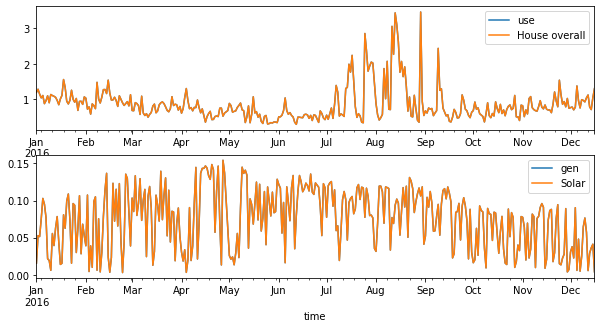

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
df[['use','House overall']].resample('D').mean().plot(ax=axes[0])
df[['gen','Solar']].resample('D').mean().plot(ax=axes[1])

In [ ]:
df.columns

Index(['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Furnace', 'Kitchen', 'Solar', 'temperature', 'humidity',
       'visibility', 'apparentTemperature', 'pressure', 'windSpeed',
       'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability'],
      dtype='object')

In [ ]:
# Drop rows with nan values 
df = df.dropna()

# The columns "use" and "house_overall" are the same, so let's remove the 'house_overall' column
df.drop(['use'], axis=1, inplace=True)

# The columns "gen" and "solar" are the same, so let's remove the 'solar' column
df.drop(['Solar'], axis=1, inplace=True)




##Checking Correlations (only weather features)

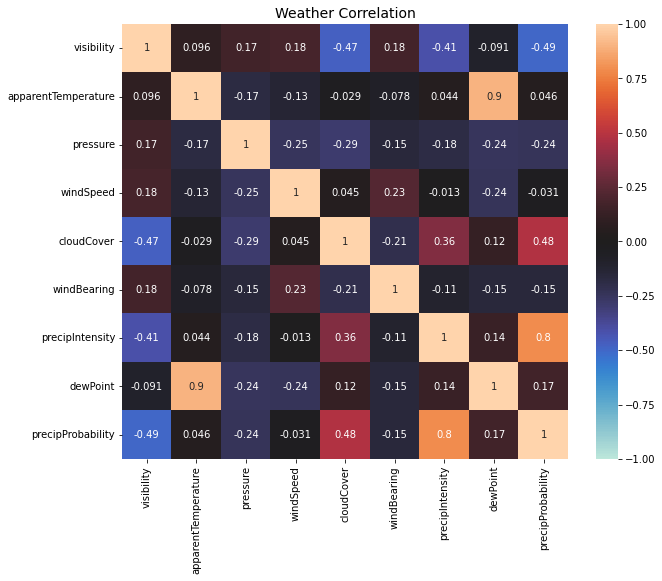

In [ ]:
#Checking Correlations (only weather features)
fig = plt.subplots(figsize=(10, 8)) 
sns.heatmap(df[df.columns[15:].tolist()].corr(), annot=True, vmin=-1.0, vmax=1.0, center=0)
plt.title('Weather Correlation', fontsize=14);

In [ ]:
df['cloudCover'].unique()

array([0.75, 0.  , 1.  , 0.31, 0.44, 0.13, 0.19, 0.25, 0.16, 0.21, 0.15,
       0.14, 0.27, 0.28, 0.17, 0.05, 0.1 , 0.26, 0.29, 0.11, 0.09, 0.12,
       0.06, 0.02, 0.08, 0.04, 0.35, 0.22, 0.23, 0.54, 0.39, 0.03, 0.07,
       0.76, 0.62, 0.18, 0.79, 0.48, 0.24, 0.57, 0.41, 0.78, 0.2 , 0.77,
       0.46, 0.55, 0.01, 0.51, 0.47, 0.5 , 0.4 , 0.3 , 0.43, 0.33, 0.6 ,
       0.68, 0.66, 0.45, 0.34, 0.52, 0.67, 0.49, 0.37, 0.36, 0.61, 0.38,
       0.42, 0.53, 0.63, 0.32, 0.56, 0.58, 0.72, 0.73, 0.71, 0.64, 0.59])

##FIRST 6 ENERGY COLUMNS

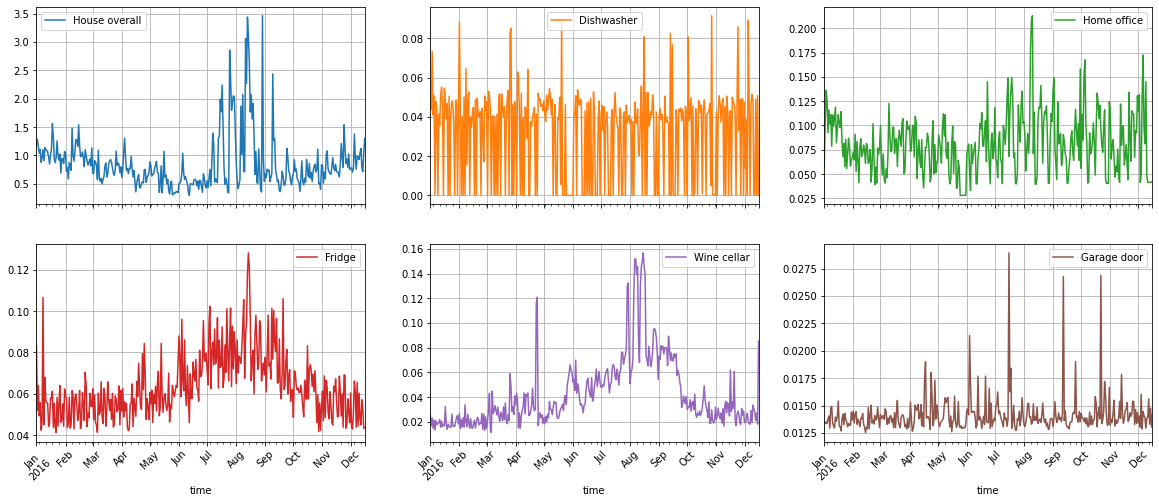

In [ ]:
df[df.columns[1:7].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(20, 8),grid=True, rot=45);

##REST OF THE ENERGY COLUMNS

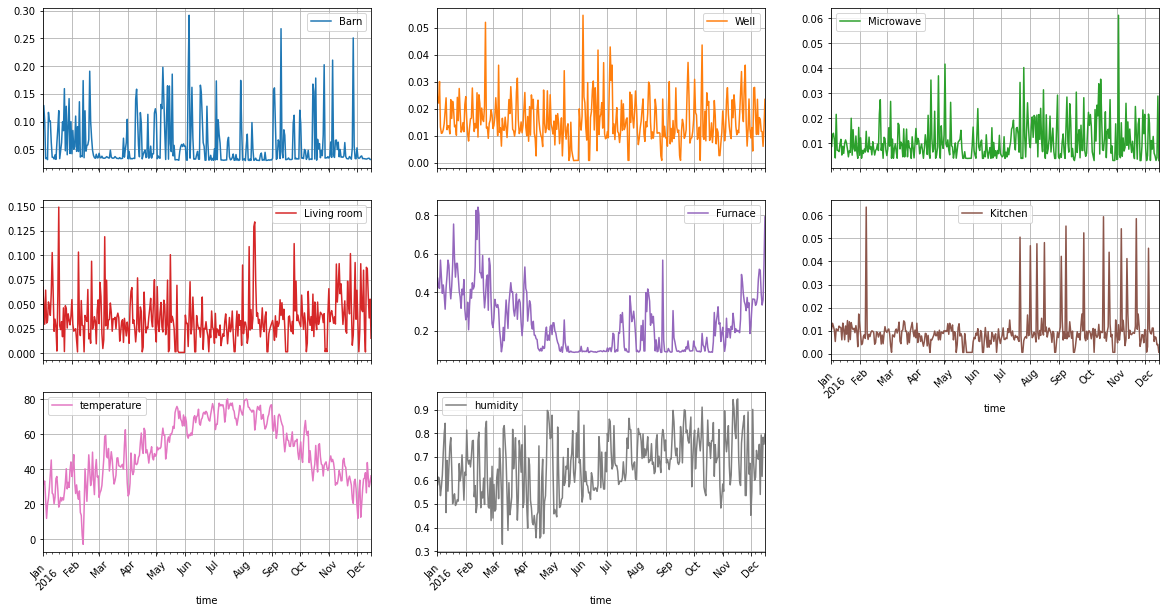

In [ ]:
df[df.columns[7:15].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(20, 10), grid=True, rot=45, xlabel=None);

##Checking Correlations (Only Energy features)

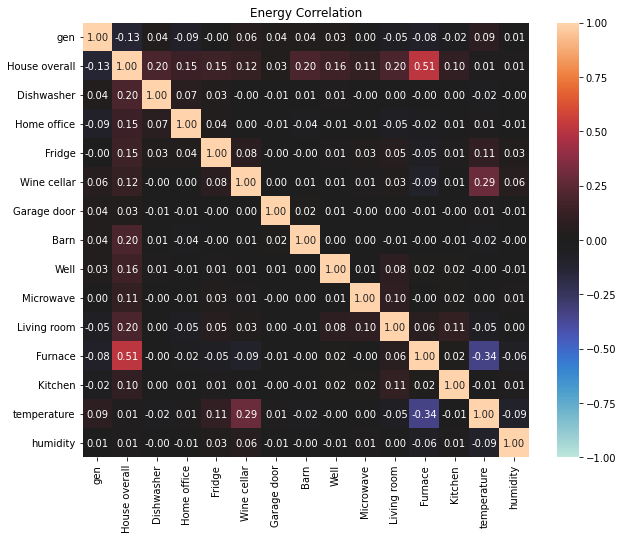

In [ ]:
fig = plt.subplots(figsize=(10, 8))
sns.heatmap(df[df.columns[0:15].tolist()].corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)
plt.title('Energy Correlation', fontsize=12);

In [ ]:
# def remove_less_percent(col, percent):
#     keys_to_conserve = [key for key,value in df[col].value_counts(normalize=True).items() if value>=percent]
#     return df[df[col].isin(keys_to_conserve)]

# print(len(df))
# df = remove_less_percent('summary', 0.05)
# print(len(df))
# df = remove_less_percent('icon', 0.05)
# print(len(df))

In [ ]:
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['hour'] = df.index.hour
df['minute'] = df.index.minute

##Averge consuption per month

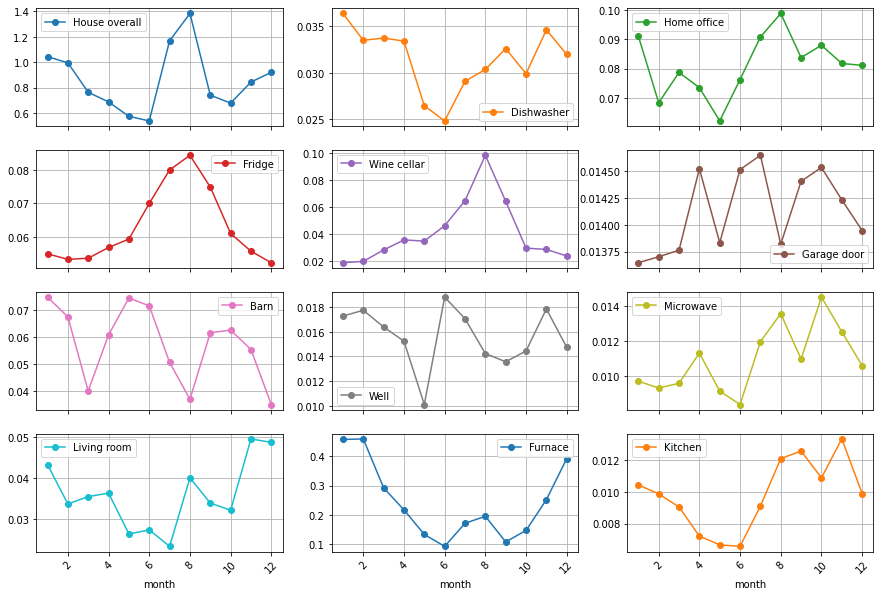

In [ ]:
mean_month = df.groupby('month').agg({i:'mean' for i in df.columns[:-5].tolist()})
mean_month[mean_month.columns[1:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(15, 10),grid=True, rot=45, xlabel=None, marker='o');

##Averge consuption per day of the week



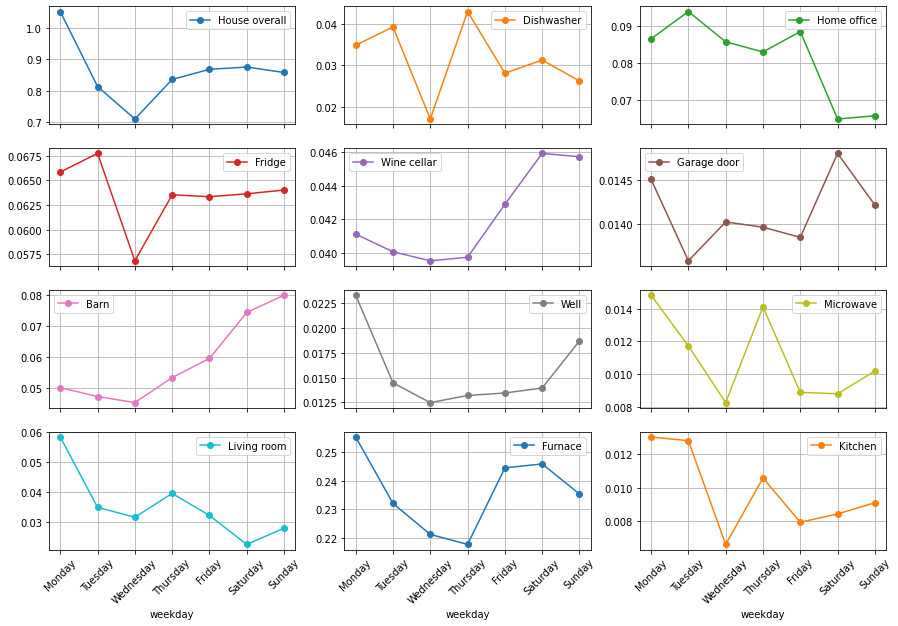

In [ ]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_weekday = df.groupby('weekday').agg({i:'mean' for i in df.columns[:-5].tolist()}).reindex(days)

mean_weekday[mean_weekday.columns[1:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(15, 10),grid=True, rot=45, xlabel=None, marker='o');

##Averge consuption per hour

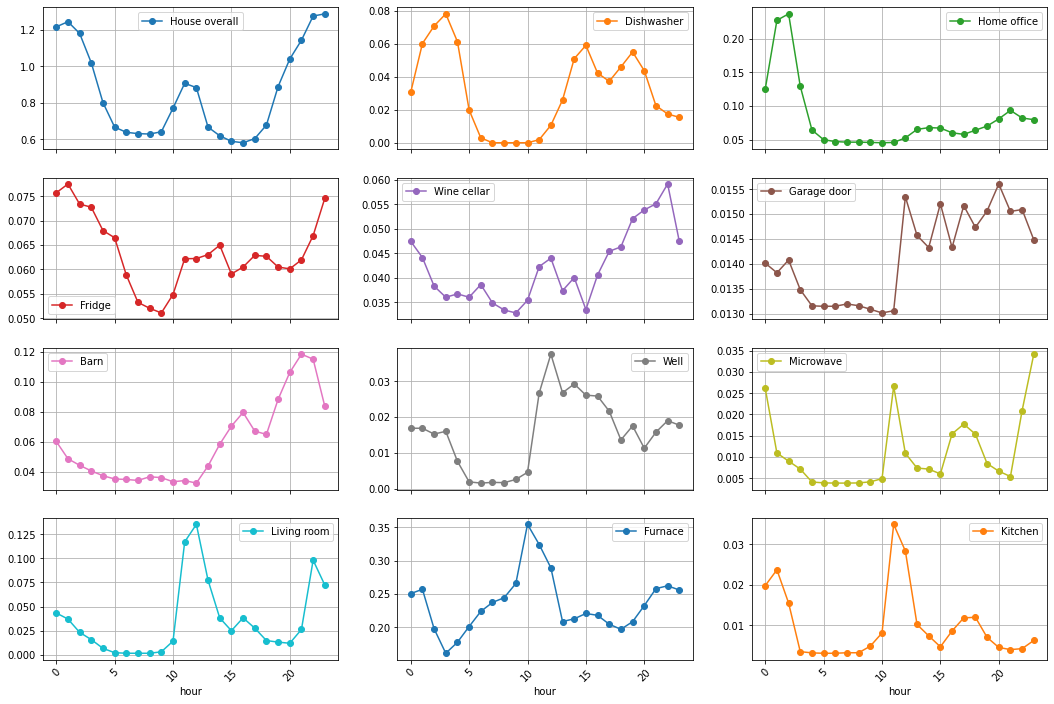

In [ ]:
mean_hour = df.groupby('hour').agg({i:'mean' for i in df.columns[:-5].tolist()})

mean_hour[mean_hour.columns[1:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(18, 12),grid=True, rot=45, xlabel=None, marker='o');

In [ ]:
df.columns

Index(['gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Furnace', 'Kitchen', 'temperature', 'humidity',
       'visibility', 'apparentTemperature', 'pressure', 'windSpeed',
       'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability', 'month', 'day', 'weekday', 'hour', 'minute'],
      dtype='object')

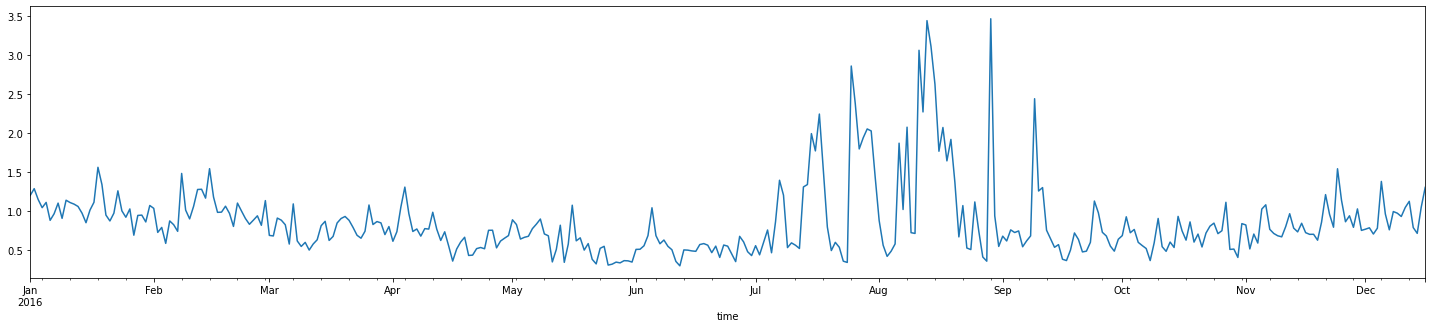

In [ ]:
df['House overall'].resample(rule='D').mean().plot(figsize=(25,5))

### CORRELATION ABOUT WEATHER DATA

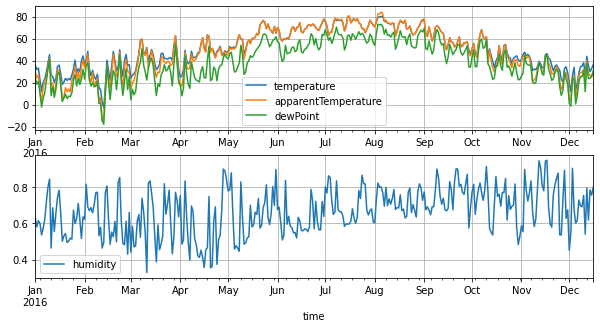

In [ ]:
#Let's check a few correlations about the weather data
fig, axes = plt.subplots(2,1, figsize=(10,5))
df[['temperature','apparentTemperature', 'dewPoint']].resample('D').mean().plot(ax=axes[0], grid=True)
df[['humidity']].resample('D').mean().plot(ax=axes[1], grid=True)

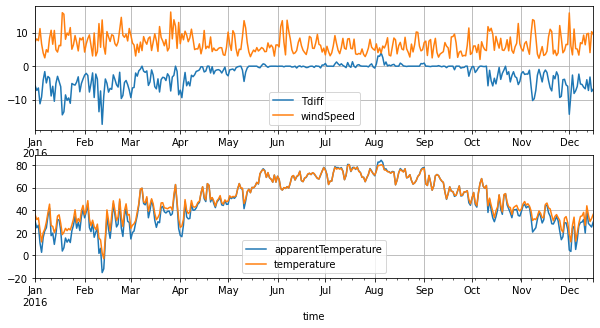

In [ ]:
df['Tdiff'] = (df['apparentTemperature']-df['temperature'])
fig, axes = plt.subplots(2,1, figsize=(10,5))
df[['Tdiff','windSpeed']].resample('D').mean().plot(ax=axes[0], grid=True)
df[['apparentTemperature', 'temperature']].resample('D').mean().plot(ax=axes[1], grid=True)

In [ ]:
df.drop('Tdiff', axis=1, inplace=True)

In [ ]:
df.columns

Index(['gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Furnace', 'Kitchen', 'temperature', 'humidity',
       'visibility', 'apparentTemperature', 'pressure', 'windSpeed',
       'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability', 'month', 'day', 'weekday', 'hour', 'minute'],
      dtype='object')

In [ ]:
consumtions = df.columns[0:13].tolist()
weather = df.columns[13:-5].tolist()
lists = [consumtions,]
for j in weather:
    correlations = []
    for i in consumtions:
        cor = df[i].corr(df[j])
        correlations.append(cor)
    lists.append(correlations)

names=['consumtions']
for i in weather:
    names.append(i+'_corr')
dataframe_corr = pd.DataFrame(np.column_stack(lists), columns=names).set_index('consumtions')

for i in dataframe_corr.columns[:].tolist():
    dataframe_corr[i] = dataframe_corr[i].apply(float)

In [ ]:
#Highlight correlations between energy and weather (red for corr > 0.1, orange for corr < -0.1)
dataframe_corr.style.applymap(lambda x: "background-color: red" if x > 0.1 else "background-color: orange" if x < -0.1 else "background-color: white")

,temperature_corr,humidity_corr,visibility_corr,apparentTemperature_corr,pressure_corr,windSpeed_corr,cloudCover_corr,windBearing_corr,precipIntensity_corr,dewPoint_corr,precipProbability_corr
consumtions,,,,,,,,,,,
gen,0.090983,0.007608,-0.017650,0.093793,-0.000222,-0.056554,0.000664,-0.007882,0.030447,0.089664,0.041192
House overall,0.010379,0.011511,-0.002609,0.005560,0.010730,-0.003853,-0.033460,0.011183,0.024836,0.016040,-0.003317
Dishwasher,-0.015716,-0.001868,-0.008064,-0.014547,0.000211,-0.001672,-0.002395,0.004016,0.006265,-0.016099,0.008189
Home office,0.011908,-0.006008,0.020638,0.010856,0.027091,-0.017898,-0.039897,0.012427,-0.029890,0.007594,-0.032861
Fridge,0.107466,0.030749,0.009019,0.107064,-0.000517,-0.024886,-0.023490,-0.008589,0.014253,0.115169,0.004794
Wine cellar,0.289168,0.055541,0.030095,0.288882,0.018494,-0.052860,-0.040467,-0.025930,0.016588,0.298207,0.006571
Garage door,0.013511,-0.007399,0.002262,0.013578,-0.000276,0.000419,-0.007457,0.012327,-0.006941,0.008350,-0.006639
Barn,-0.017188,-0.002141,0.008376,-0.015189,0.011716,-0.015196,-0.011635,0.006255,-0.007258,-0.016738,-0.006063
Well,-0.004691,-0.006590,-0.001069,-0.004741,0.002994,0.000677,-0.003029,0.004085,-0.004377,-0.007346,-0.002788


In [ ]:
#Check whether House overall corresponds to the sum of other comsumpitons (it seems not)
df['Sum_usage'] = df[list(df.columns[1:12])].sum(axis=1)
df['Usage_diff'] = df['House overall'] - df['Sum_usage']
df.head(2)

,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,Kitchen,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,month,day,weekday,hour,minute,Sum_usage,Usage_diff
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.003483,0.932833,0.000033,0.442633,0.12415,0.006983,0.013083,0.03135,0.001017,0.004067,0.001517,0.082617,0.000567,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,0,1.640283,-0.707450
2016-01-01 05:01:00,0.003467,0.934333,0.000000,0.444067,0.12400,0.006983,0.013117,0.03150,0.001017,0.004067,0.001650,0.084533,0.000567,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,1,1.645267,-0.710933


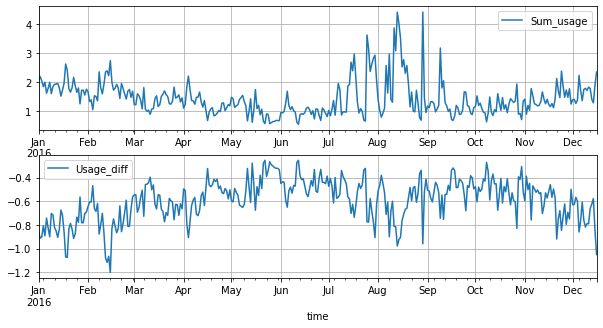

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
df['Sum_usage'].resample('D').mean().plot(ax=axes[0], grid=True, legend=True)
df['Usage_diff'].resample('D').mean().plot(ax=axes[1], grid=True, legend=True)

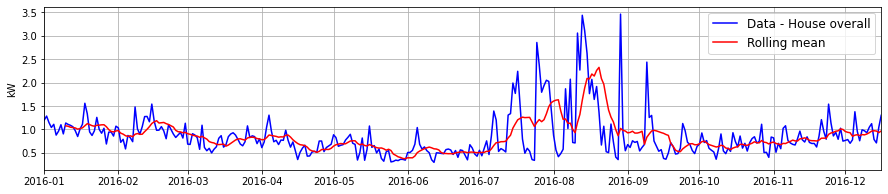

In [ ]:
data_daily = df['House overall'].resample('d').mean()
#Define la moving average
baseline = data_daily.rolling(window=10).mean()
#Plot
plt.figure(figsize=(15,3))
plt.plot(data_daily, c='blue',label='Data - House overall')
plt.plot(baseline, c='red', label='Rolling mean')
plt.legend(fontsize=12)
plt.ylabel('kW')
plt.margins(x=0)
plt.grid()

MSE: 0.071
RMSE: 0.266
MAE: 0.177
MAPE: 0.236
MASE: 0.721
R^2 score: 0.077
R^2 manual: 0.0767596381423179


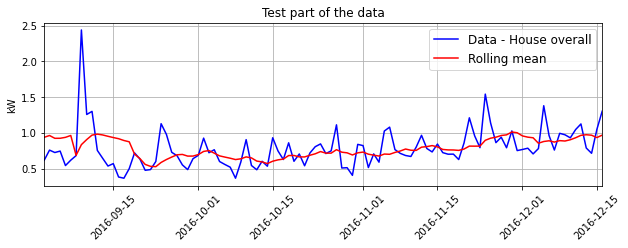

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Split time series and take the last 30% of it, like if it was the test part of the model
size = int(len(data_daily)*0.7)
train = data_daily[:size]
test = data_daily[size:]
#take moving average for this portion of the data
baseline_test = baseline.loc[test.index[0]:]
#Plot
plt.figure(figsize=(10,3))
plt.plot(test, c='blue',label='Data - House overall')
plt.plot(baseline_test, c='red', label='Rolling mean')
plt.legend(fontsize=12)
plt.ylabel('kW')
plt.margins(x=0)
plt.title('Test part of the data'), plt.grid(), plt.xticks(rotation=45);

# calculate error
print('MSE: %.3f' % (mean_squared_error(test, baseline_test)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, baseline_test)))
MAE = mean_absolute_error(test, baseline_test)
MAPE = np.mean(np.abs(baseline_test - test)/np.abs(test))
MASE = np.mean(np.abs(test - baseline_test))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, baseline_test))

print('R^2 manual:', 1-(sum((baseline_test-test)**2)/sum((np.mean(test)-test)**2)))

RMSE: 0.304
MAE: 0.194
MAPE: 0.233
MASE: 0.790
R^2 score: -0.203


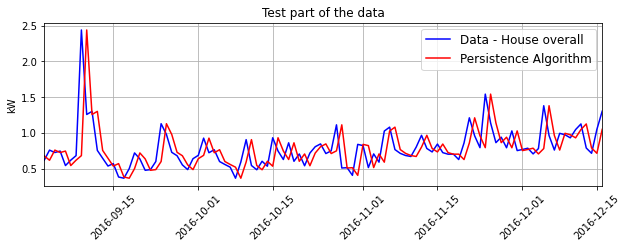

In [ ]:
baseline = data_daily.shift(1)
baseline = baseline.dropna()
data_actual = data_daily.iloc[1:]
size = int(len(data_actual)*0.7)
train = data_daily[:size]
test = data_actual[size:]
baseline_test = baseline.loc[test.index[0]:]

#Plot
plt.figure(figsize=(10,3))
plt.plot(test, c='blue',label='Data - House overall')
plt.plot(baseline_test, c='red', label='Persistence Algorithm')
plt.legend(fontsize=12)
plt.ylabel('kW')
plt.margins(x=0)
plt.title('Test part of the data'), plt.grid(), plt.xticks(rotation=45);

# calcolo errore
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, baseline_test)))
MAE = mean_absolute_error(test, baseline_test)
MAPE = np.mean(np.abs(baseline_test - test)/np.abs(test))
MASE = np.mean(np.abs(test - baseline_test ))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, baseline_test))

##ARIMA

Auto Regressive Integrated Moving Average. a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

The first step to build an ARIMA model is to make the time series stationary. Term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other. The most common approach is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

The value of d, therefore, is the minimum number of differencing needed to make the series stationary.**bold text**

(None, None)

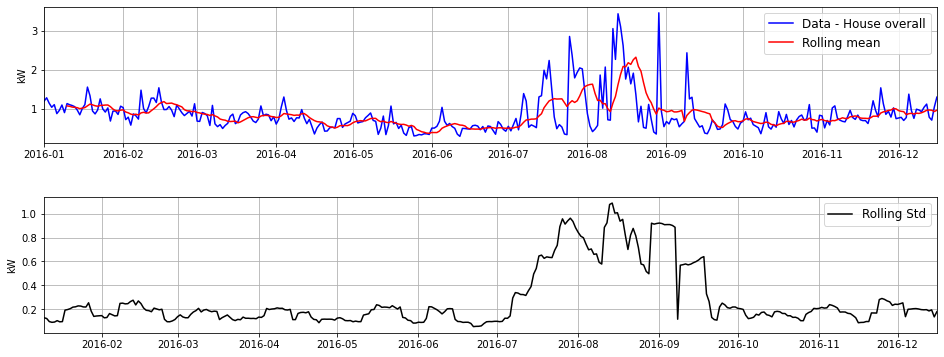

In [ ]:
data_daily = df['House overall'].resample('d').mean()
rollingMEAN = data_daily.rolling(window=10).mean()
rollingSTD = data_daily.rolling(window=10).std()
#Plot
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,6))
plt.subplots_adjust(hspace=0.4)
ax1.plot(data_daily, c='blue',label='Data - House overall')
ax1.plot(rollingMEAN, c='red', label='Rolling mean')
ax2.plot(rollingSTD, c='black',label = 'Rolling Std')

ax1.legend(fontsize=12), ax2.legend(fontsize=12)
ax1.set_ylabel('kW'), ax2.set_ylabel('kW')
ax1.margins(x=0), ax2.margins(x=0)
ax1.grid(), ax2.grid()

In [ ]:
from statsmodels.tsa.stattools import adfuller

resultDFtest = adfuller(data_daily, autolag='AIC')
Out = pd.Series(resultDFtest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key1, value1 in resultDFtest[4].items():
    Out['Critical Value (%s)'%key1] = value1
    
print('Various Tests RESULTS: \n\n{}'.format(Out))

Various Tests RESULTS: 

Test Statistic                  -2.988003
p-value                          0.036030
#Lags Used                      10.000000
Number of Observations Used    340.000000
Critical Value (1%)             -3.449730
Critical Value (5%)             -2.870079
Critical Value (10%)            -2.571319
dtype: float64


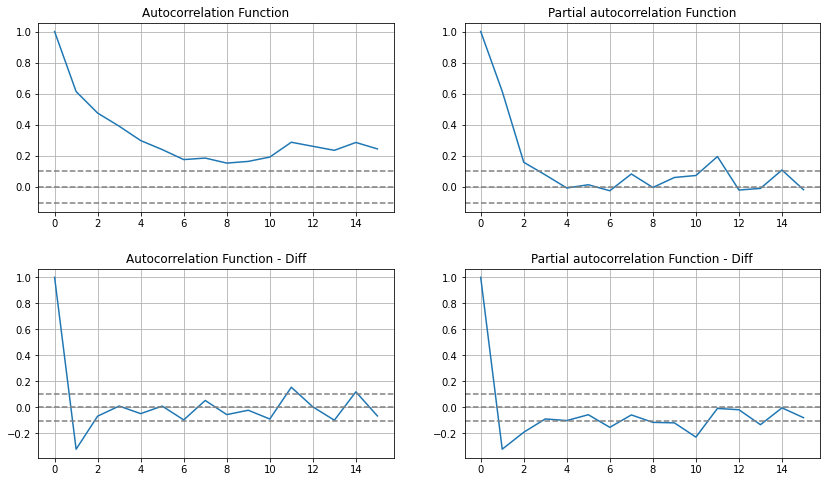

In [ ]:
data_daily_diff = data_daily-data_daily.shift(1)
data_daily_diff = data_daily_diff.dropna()

#AUTOCORRELATION FUNCTION AND PARTIAL AUTOCORRELATION FUNCTION PLOTS
from statsmodels.graphics.tsaplots import acf, pacf
ACF = acf(data_daily, nlags=15)
PACF = pacf(data_daily, nlags=15, method='ols') #ols - ordinary least squared
ACF1 = acf(data_daily_diff, nlags=15)
PACF1 = pacf(data_daily_diff, nlags=15, method='ols') #ols - ordinary least squared

def plots_corr(ax,func,dat,title):
    ax.plot(func)
    ax.axhline(y=0, linestyle='--',c='gray')
    ax.axhline(y=-1.96/np.sqrt(len(dat)),linestyle='--',c='gray')
    ax.axhline(y=1.96/np.sqrt(len(dat)),linestyle='--',c='gray')
    ax.grid()
    ax.set_title(title)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(14,8))
plt.subplots_adjust(hspace=0.3)
plots_corr(ax1, ACF, data_daily,'Autocorrelation Function')
plots_corr(ax2, PACF, data_daily,'Partial autocorrelation Function')
plots_corr(ax3, ACF1, data_daily_diff,'Autocorrelation Function - Diff')
plots_corr(ax4, PACF1, data_daily_diff,'Partial autocorrelation Function - Diff')

###TRANING

In [ ]:
size = int(len(data_daily)*0.7)
train = data_daily[:size]
test = data_daily[size:]
print('Number of points in series:', len(data_daily))
print('Number of points in train:', len(train))
print('Number of points in test:', len(test))

Number of points in series: 351
Number of points in train: 245
Number of points in test: 106


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(2,1,1))
#model = sm.tsa.statespace.SARIMAX(train, order=(2,1,1), seasonal_order=(5,0,1,12))
model_fit = model.fit()
print('Akaike information criterion: ', model_fit.aic)

Akaike information criterion:  258.4623694498136


                               SARIMAX Results                                
Dep. Variable:          House overall   No. Observations:                  245
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -125.231
Date:                Mon, 26 Dec 2022   AIC                            258.462
Time:                        09:23:17   BIC                            272.451
Sample:                    01-01-2016   HQIC                           264.096
                         - 09-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4590      0.051      9.052      0.000       0.360       0.558
ar.L2          0.0999      0.037      2.667      0.008       0.026       0.173
ma.L1         -0.9438      0.026    -35.671      0.0

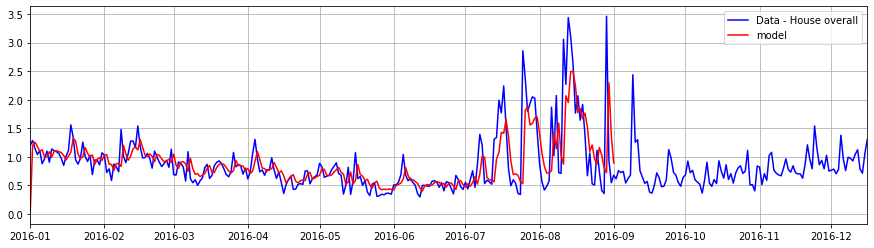

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(data_daily, c='blue',label='Data - House overall')
plt.plot(model_fit.predict(dynamic=False), c='red', label='model')
plt.legend()
plt.grid(), plt.margins(x=0);
print(model_fit.summary())

##RESIDUALS

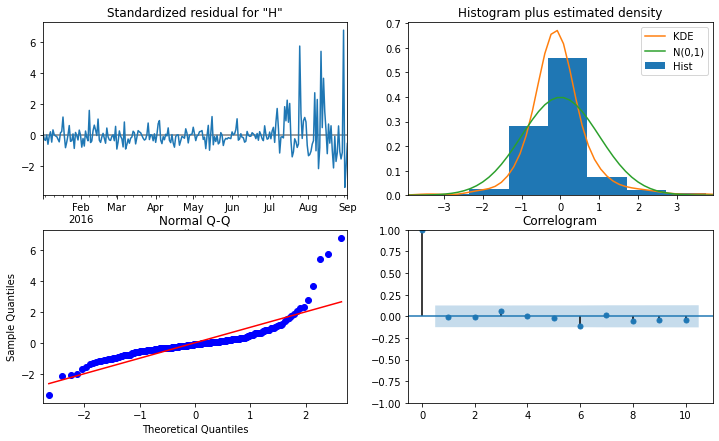

In [ ]:
model_fit.plot_diagnostics(figsize=(12,7))
plt.show()

##SINGLE FORCAST

MSE: 0.259
RMSE: 0.509
MAE: 0.463
MAPE: 0.722
MASE: 1.886
R^2 score: -2.379


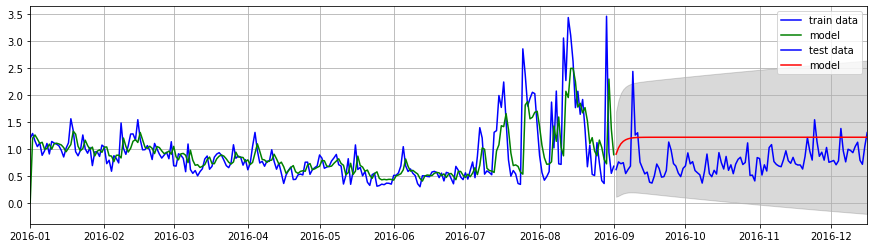

In [ ]:
new_fit = model_fit.append(data_daily[size:size+1], refit=False)
forecast = model_fit.forecast(len(test))
confidence = model_fit.get_forecast(len(test)).conf_int(0.05)
#forecast = model_fit.predict(246, 351)
plt.figure(figsize=(15,4))
plt.plot(train, c='blue',label='train data')
plt.plot(model_fit.predict(dynamic=False), c='green', label='model')
plt.plot(test, c='blue',label='test data')
plt.plot(forecast, c='red', label='model')
plt.fill_between(confidence.index,confidence['lower House overall'],
                 confidence['upper House overall'], color='k', alpha=.15)
plt.legend()
plt.grid(), plt.margins(x=0);
# calcolo errore
print('MSE: %.3f' % (mean_squared_error(test, forecast)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, forecast)))
MAE = mean_absolute_error(test, forecast)
MAPE = np.mean(np.abs(forecast - test)/np.abs(test))
MASE = np.mean(np.abs(test - forecast))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, forecast))

## ROLLING FORCAST

In [ ]:
n = 1
X = data_daily.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
predictions = list()
confidence = list()
history = [x for x in train]
# walk-forward validation
for t in range(0,len(test),n):
    model = ARIMA(history, order=(2,0,1))
    model_fit = model.fit()
    output = model_fit.forecast(n).tolist()
    conf = model_fit.get_forecast(n).conf_int(0.05)
    predictions.extend(output)
    confidence.extend(conf)
    obs = test.tolist()[t:t+n]
    history = history[n:]
    history.extend(obs);  
conf_int =  np.vstack(confidence)

#TEST

MSE: 0.06930
RMSE: 0.263
MAE: 0.174
MAPE: 0.226
MASE: 0.710
R^2 score: 0.095


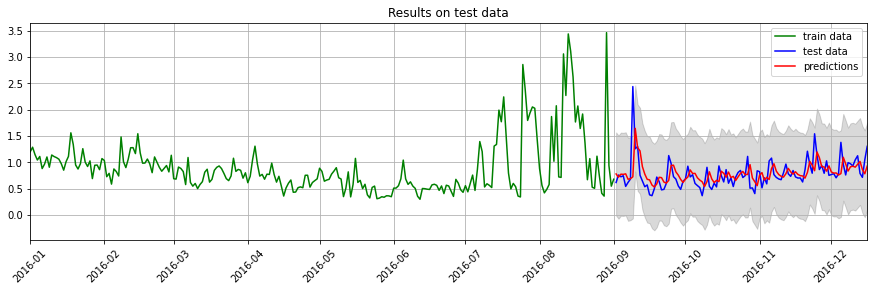

In [ ]:
# plot forecasts against actual outcomes
m = len(predictions) - len(test)
index_extended = data_daily[size:].index.union(data_daily[size:].index.shift((m))[-(m):])
predictions_series = pd.Series(predictions, index=index_extended)
confidence = pd.DataFrame(conf_int, columns=['lower', 'upper'])
plt.figure(figsize=(15,4))
plt.plot(data_daily[:size], c='green',label='train data')
plt.plot(data_daily[size:], c='blue',label='test data')
plt.plot(predictions_series, c='red', label='predictions')
plt.fill_between(predictions_series.index, confidence['lower'],
                 confidence['upper'], color='k', alpha=.15)
plt.legend()
plt.grid(), plt.margins(x=0)
plt.title('Results on test data'), plt.xticks(rotation=45)

# evaluate forecasts
print('MSE: %.5f' % (mean_squared_error(test, predictions[:len(test)])))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, predictions[:len(test)])))
MAE = mean_absolute_error(test, predictions[:len(test)])
MAPE = np.mean(np.abs(predictions[:len(test)] - test)/np.abs(test))
MASE = np.mean(np.abs(test - predictions[:len(test)]))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, predictions[:len(test)]))

#Auto-Arima

<Figure size 432x288 with 0 Axes>

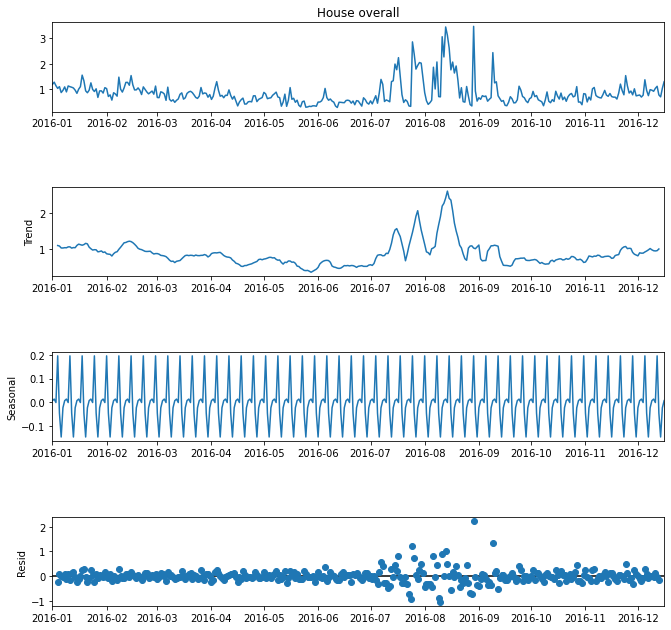

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_daily, model='additive')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(10, 10)

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 3.9 MB/s 
     |████████████████████████████████| 9.9 MB 28.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
from pmdarima.arima import auto_arima, ADFTest
ADFTest(alpha=0.05).should_diff(data_daily)

(0.01, False)

In [ ]:
size = int(len(data_daily)*0.7)
train = data_daily[:size]
test = data_daily[size:]

arima_model = auto_arima(train, start_p=0, d=0, start_q=0, max_p=5, max_d=5, max_q=5,
                        start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,  m=12, #if m=1 seasonal is set to False
                        seasonal=True, error_action='warn', trace=True, suppress_warnings=True,
                        stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=450.335, Time=0.23 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=313.370, Time=1.19 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=331.210, Time=1.53 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=448.376, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=348.030, Time=0.19 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=310.191, Time=10.02 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=307.438, Time=10.27 sec
 ARIMA(1,0,0)(4,1,0)[12] intercept   : AIC=302.917, Time=13.08 sec
 ARIMA(1,0,0)(5,1,0)[12] intercept   : AIC=302.753, Time=16.57 sec
 ARIMA(1,0,0)(5,1,1)[12] intercept   : AIC=inf, Time=28.59 sec
 ARIMA(1,0,0)(4,1,1)[12] intercept   : AIC=inf, Time=19.24 sec
 ARIMA(0,0,0)(5,1,0)[12] intercept   : AIC=400.160, Time=8.61 sec
 ARIMA(2,0,0)(5,1,0)[12] intercept   : AIC=300.461, Time=13.58 sec
 ARIMA(2,0,0)(4,1,0)[12] intercept   : AIC=300.900, Time=10.12 sec
 ARIMA(2,0,0)(5,1,1)[12] intercep

In [ ]:
arima_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  245
Model:             SARIMAX(1, 0, 1)x(5, 1, [], 12)   Log Likelihood                -140.882
Date:                             Mon, 26 Dec 2022   AIC                            297.765
Time:                                     09:32:52   BIC                            325.373
Sample:                                 01-01-2016   HQIC                           308.897
                                      - 09-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7694      0.048     16.103      0.000       0.676       0.863
ma.L1         -0.2538      0.069     -3.675      0.000      -0.389      -0.118
ar.S.L12      -0.6514      0.057    -11.374      0.000      -0.764      -0.539
ar.S.L24      -0.5026      0.080     -6.260      0.000      -0.660      -0.345
ar.S.L36      -0.4397      0.108     -4.082      0.000      -0.651      -0.229
ar.S.L48      -0.3706      0.145     -2.558      0.011      -0.655      -0.087
ar.S.L60      -0.1733      0.185     -0.936      0.349      -0.536       0.190
sigma2         0.1871      0.007     25.137      0.000       0.173       0.202
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2240.35
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              10.82   Skew:                             2.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#TEST

Actual values:  [0.616 0.758 0.724 0.744 0.542 0.617 0.681 2.438 1.256 1.299]
Predictions:    [0.426 0.661 0.912 0.84  1.155 0.917 0.739 0.575 1.705 1.205]
RMSE: 0.581
MAE: 0.469
MAPE: 0.712
MASE: 1.909
R^2 score: -3.404


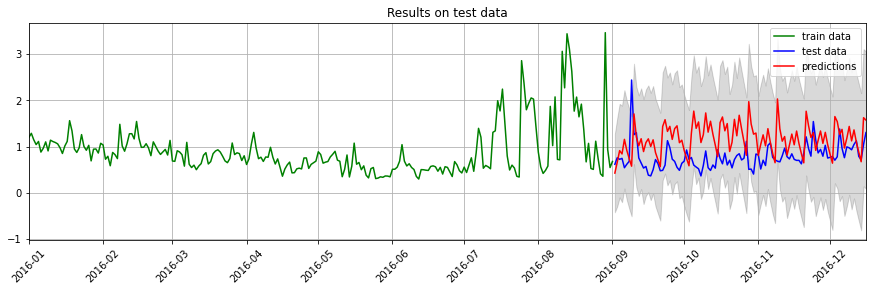

In [ ]:
y_forec, conf_int  = arima_model.predict(len(test),return_conf_int=True,alpha=0.05)
pred = pd.Series(y_forec, index=test.index)
pred.columns = ['predicted']
confidence = pd.DataFrame(conf_int, columns=['lower', 'upper'])

plt.figure(figsize=(15,4))
plt.plot(train, c='green', label='train data')
plt.plot(test, c='blue', label='test data')
plt.plot(pred, c='red', label='predictions')
plt.legend()
plt.grid(), plt.margins(x=0)
plt.title('Results on test data'), plt.xticks(rotation=45)
plt.fill_between(test.index, confidence['lower'],
                 confidence['upper'], color='k', alpha=.15)


from sklearn.metrics import r2_score
print('Actual values: ', np.around(test[:10].tolist(),3))
print('Predictions:   ', np.around(pred[:10].tolist(),3))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, pred)))
MAE = mean_absolute_error(test, pred)
MAPE = np.mean(np.abs(pred - test)/np.abs(test))
MASE = np.mean(np.abs(test - pred ))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, pred))


#SARIMAX with exogs

In [ ]:
data_exog = pd.get_dummies(df, columns = ['month','weekday'] , prefix = ['month','weekday'])

In [ ]:
ext_var_list = ['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6','month_7', 'month_8', 'month_9',
                'month_10', 'month_11', 'month_12','weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
                'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday','weekday_Wednesday']
exog_part = data_exog[ext_var_list]
exog_part = exog_part.resample('d').mean()

#TRAIN

In [ ]:
size = int(len(data_daily)*0.7)
train = data_daily[:size]
test = data_daily[size:]

model = sm.tsa.statespace.SARIMAX(endog=train, exog=exog_part[:size], order=(2,1,1), seasonal_order=(5,0,1,12))
model_fit = model.fit()
print('Akaike information criterion: ', model_fit.aic)

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,


Akaike information criterion:  257.13508315669225


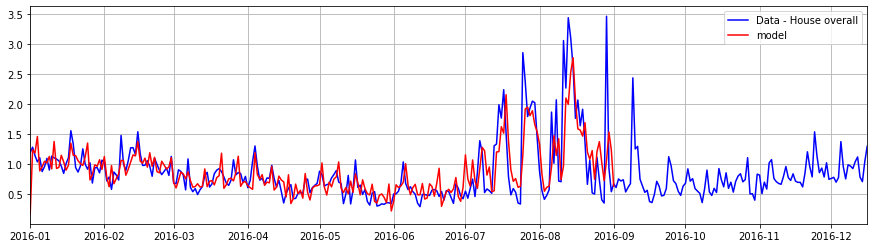

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(data_daily, c='blue',label='Data - House overall')
plt.plot(model_fit.predict(dynamic=False), c='red', label='model')
plt.legend()
plt.grid(), plt.margins(x=0);

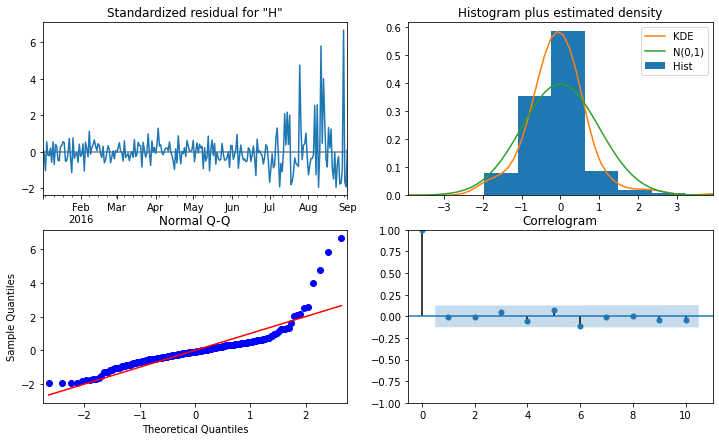

In [ ]:
model_fit.plot_diagnostics(figsize=(12,7))
plt.show()

#TEST

MSE: 0.100
RMSE: 0.317
MAE: 0.243
MAPE: 0.361
MASE: 0.989
R^2 score: -0.312


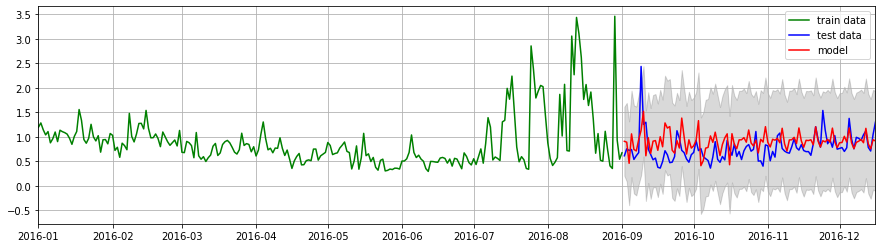

In [ ]:
forecast = model_fit.forecast(len(test), exog = exog_part[size:])
confidence = model_fit.get_forecast(len(test), exog = exog_part[size:]).conf_int(0.05)
#forecast = model_fit.predict(246, 351)
plt.figure(figsize=(15,4))
plt.plot(train, c='green',label='train data')
plt.plot(test, c='blue',label='test data')
plt.plot(forecast, c='red', label='model')
plt.fill_between(confidence.index,confidence['lower House overall'],
                 confidence['upper House overall'], color='k', alpha=.15)
plt.legend()
plt.grid(), plt.margins(x=0);
# calcolo errore
print('MSE: %.3f' % (mean_squared_error(test, forecast)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, forecast)))
MAE = mean_absolute_error(test, forecast)
MAPE = np.mean(np.abs(forecast - test)/np.abs(test))
MASE = np.mean(np.abs(test - forecast))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, forecast))

#LSTM UNIVARIATE
Classical forecasting methods like ARIMA and HWES are still popular and powerful but they lack the overall generalizability that memory-based models like LSTM offer. The LSTM rectifies a huge issue that recurrent neural networks suffer from: short-memory. Using a series of ‘gates,’ each with its own RNN, the LSTM manages to keep, forget or ignore data points based on a probabilistic model.

Univariate single step type. Using past values, we will predict only one value for the future.

We can divide the sequence into multiple inputs/output patterns, converting the sequence to a supervised learning problem. From the division of data in the input/output pattern, the model will learn about the input patterns and the output, a single step output.

In [ ]:
#Sequencing function
def sampling(sequence, n_steps):
    X, Y = list(), list()
    for i in range(len(sequence)):
        sam = i + n_steps
        if sam > len(sequence)-1:
            break
        x, y = sequence[i:sam], sequence[sam]
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

In [ ]:
#Manual MinMax Scaler function and inverse
def MinMaxScale(t, t_or):
    return (t-t_or.min())/(t_or.max()-t_or.min())

def InverseMinMaxScale(t, t_or):
    return t*(t_or.max()-t_or.min())+t_or.min()

##Train, Validation, Test split attempt

Training size: 245
Training + Validation size: 298


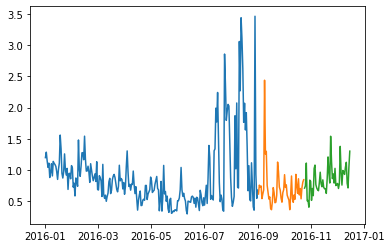

In [ ]:
n_steps = 10
X, Y = sampling(data_daily.tolist(), n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))
size = int(len(data_daily)*0.7)
size2 = int(((len(data_daily)-size)/2)+size)
X_train, Y_train = X[:size], Y[:size]
X_val, Y_val = X[size:size2], Y[size:size2]
X_test, Y_test = X[size2:], Y[size2:]
print('Training size:', size)
print('Training + Validation size:', size2)
plt.plot(data_daily[:size])
plt.plot(data_daily[size:size2])
plt.plot(data_daily[size2:])

##Training and Validation loss comparison

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Bidirectional

In [ ]:
n_features = 1
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
#model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Loop through different epochs to check the loss for Training and Validation
mse_train = list()
mse_val = list()
for epoch in range(0,100,5):
    model_fit = model.fit(X_train, Y_train, epochs=epoch, verbose=0)
    Train_pred = model.predict(X_train, verbose=0)
    Val_pred = model.predict(X_val, verbose=0)
    mse_t = mean_squared_error(Train_pred, Y_train)
    mse_v = mean_squared_error(Val_pred, Y_val)
    mse_train.append(mse_t)
    mse_val.append(mse_v)

Train MSE minimum: 0.035685951772903186
Validation MSE minimum: 0.043556323107178184


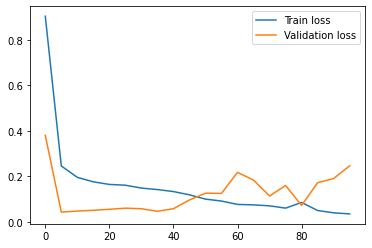

In [ ]:
# Plot the loss results
plt.plot(range(0,100,5), mse_train, label='Train loss')
plt.plot(range(0,100,5), mse_val,  label='Validation loss')
plt.legend()
print('Train MSE minimum:', min(mse_train))
print('Validation MSE minimum:', min(mse_val))

#Model
Here we just split into 70% training and 30% test. The sampling function defined at the beginning is already a form of walk-forward validation. BUT, we could add a validation set to keep separate from the training set, adding validation_split=0.1 in the model fit (much easier than doing the for loop above). It will take 10% of the training as validation, not training there but just calculating the error every epoch, to be compared with the training loss. You can try, but the best result obtained is:

70% training, no validation_split, n_steps=2, epochs=200

In [ ]:
n_steps = 2
X, Y = sampling(data_daily.tolist(), n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))
size = int(len(data_daily)*0.85)
X_train_or, Y_train_or = X[:size], Y[:size]
X_test_or, Y_test_or = X[size:], Y[size:]

#If we want to normalize with MinMax, change names above adding _or to retain the originals, and apply the below

X_train = MinMaxScale(X_train_or, data_daily)
Y_train = MinMaxScale(Y_train_or, data_daily)
X_test = MinMaxScale(X_test_or, data_daily)
Y_test = MinMaxScale(Y_test_or, data_daily)


n_features = 1
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
#model.add(LSTM(50, activation='relu', return_sequences = True))
#model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model_fit = model.fit(X_train, Y_train, epochs=200, verbose=0)

Train_pred = model.predict(X_train, verbose=0)
Y_pred = model.predict(X_test, verbose=0)
print('MSE Train', mean_squared_error(Train_pred, Y_train))

MSE Train 0.014442308746975803


Train MSE minimum: 0.014475787058472633


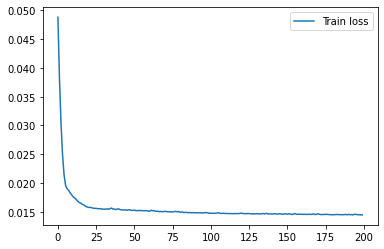

In [ ]:
plt.plot(model_fit.history['loss'], label='Train loss')
#plt.plot(model_fit.history['val_loss'], label='Validation loss')
plt.legend()
print('Train MSE minimum:', min(model_fit.history['loss']))
#print('Validation MSE minimum:', min(model_fit.history['val_loss']))

In [ ]:
#In case we normalized before, to restore the original scale apply this. In the metrics calculations below you'll 
#have to change Y_test to Y_test_or.

Y_pred = InverseMinMaxScale(Y_pred, data_daily)

MSE: 0.04996
RMSE: 0.22351
MAE: 0.171
MAPE: 0.236
MASE: 0.989
R^2 score: -0.007


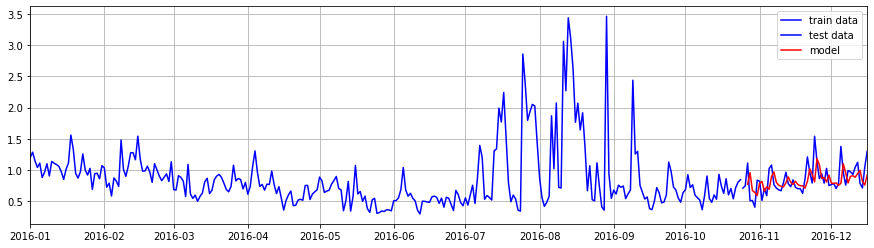

In [ ]:
Y_pred_series = pd.Series(Y_pred.flatten().tolist(), index=data_daily[size+n_steps:].index)
Train_pred_series = pd.Series(Train_pred.flatten().tolist(), index=data_daily[:size].index)

#Plot
plt.figure(figsize=(15,4))
plt.plot(data_daily[:size], c='blue',label='train data')
#plt.plot(Train_pred_series, c='green',label='train data')
plt.plot(data_daily[size:], c='blue',label='test data')
plt.plot(Y_pred_series, c='red', label='model')
plt.legend()
plt.grid(), plt.margins(x=0);

# calcolo errore
print('MSE: %.5f' % (mean_squared_error(Y_pred, Y_test_or)))
print('RMSE: %.5f' % np.sqrt(mean_squared_error(Y_pred, Y_test_or)))
MAE = mean_absolute_error(Y_test_or, Y_pred)
MAPE = np.mean(np.abs(Y_pred - Y_test_or)/np.abs(Y_test_or))
#MASE = np.mean(np.abs(Y_test - Y_pred))/(np.abs(np.diff(X_train)).sum()/(len(X_train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(Y_test_or, Y_pred))


In [ ]:
print('Predictions', Y_pred[:10].flatten().tolist())
print()
print('Test', Y_test_or[:10].tolist())

Predictions [0.7713093161582947, 0.9576959609985352, 0.6712664365768433, 0.6412660479545593, 0.5901182889938354, 0.7864648103713989, 0.8177255392074585, 0.6590791940689087, 0.733788013458252, 0.6907615065574646]

Test [1.111133715267361, 0.5074271412131944, 0.5117826388826389, 0.4046181944333333, 0.8378464930652778, 0.8206565625402777, 0.5137167939784723, 0.7041898495319445, 0.588964884267361, 1.0243804629513888]


##LSTM Multivariate

In [ ]:
data.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [ ]:
#Reduce size of dataframe with only the columns we are interested in
data_daily = df[['House overall', 'Furnace', 'Living room', 'Barn', 'temperature', 'humidity',
                   'apparentTemperature', 'pressure', 'cloudCover','windBearing', 'precipIntensity',
                   'dewPoint', 'precipProbability']]
#Rescale
data_daily = data_daily.resample('D').mean()
#Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
data_daily[data_daily.columns[1:]] = scaler.fit_transform(data_daily[data_daily.columns[1:]])
scaler_target = MinMaxScaler(feature_range=(0, 1))
data_daily[['House overall']] = scaler_target.fit_transform(data_daily[['House overall']])

size = int(len(data_daily)*0.7)
data_daily_train = data_daily[:size]
data_daily_test = data_daily[size:]
X_train, X_test = [], []
Y_train, Y_test = [], []
n_past=1
n_future=1
for i in range(n_past, len(data_daily_train)-n_future+1):
    X_train.append(data_daily_train.iloc[i-n_past:i, 0:data_daily.shape[1]])
    Y_train.append(data_daily_train.iloc[i+n_future-1:i+n_future, 0])
for i in range(n_past, len(data_daily_test)-n_future+1):
    X_test.append(data_daily_test.iloc[i-n_past:i, 0:data_daily_test.shape[1]])
    Y_test.append(data_daily_test.iloc[i+n_future-1:i+n_future, 0])
    
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = np.array(X_test), np.array(Y_test)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('Y_train shape', Y_train.shape)
print('Y_test shape', Y_test.shape)

X_train shape (244, 1, 13)
X_test shape (105, 1, 13)
Y_train shape (244, 1)
Y_test shape (105, 1)


In [ ]:
model = Sequential()
model.add(LSTM(25, activation='relu', return_sequences = False, input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(LSTM(50, activation='relu', return_sequences = True))
#model.add(LSTM(15, activation='relu', return_sequences = False))
#model.add(Dropout(0.2))
model.add(Dense(Y_train.shape[1]))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 25)                3900      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 3,926
Trainable params: 3,926
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_fit = model.fit(X_train, Y_train, epochs=60, verbose=0)

Train_pred = model.predict(X_train, verbose=0)
Y_pred = model.predict(X_test, verbose=0)

Train MSE minimum: 0.017097169533371925


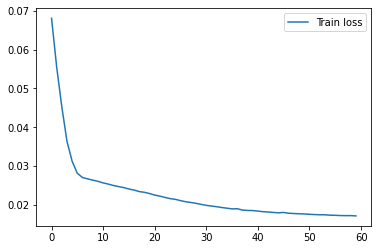

In [ ]:
plt.plot(model_fit.history['loss'], label='Train loss')
#plt.plot(model_fit.history['val_loss'], label='Validation loss')
plt.legend()
print('Train MSE minimum:', min(model_fit.history['loss']))
#print('Validation MSE minimum:', min(model_fit.history['val_loss']))

In [ ]:
#Invert scaling
data_daily[['House overall']] = scaler_target.inverse_transform(data_daily[['House overall']])
Y_pred = scaler_target.inverse_transform(Y_pred)
Train_pred = scaler_target.inverse_transform(Train_pred)

0.15158348879878306

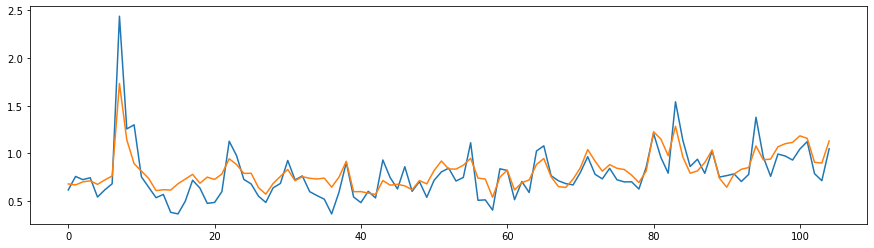

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(data_daily[['House overall']][size:-1].values)
plt.plot(Y_pred)
np.sqrt(mean_squared_error(Y_pred[:,0].tolist(), data_daily[['House overall']][size:-1].values))

MSE: 0.02298
RMSE: 0.15158
MAE: 0.116
MAPE: 0.165
R^2 score: 0.692


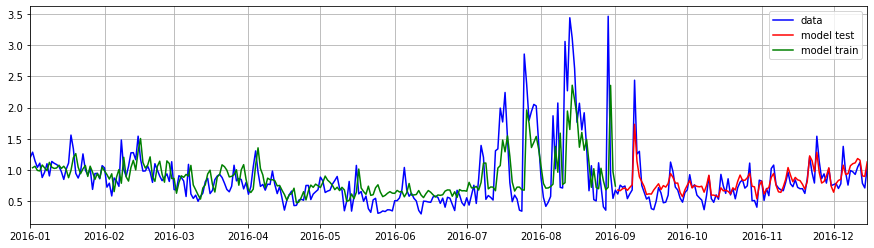

In [ ]:
Y_pred_series = pd.Series(Y_pred.flatten().tolist(), index=data_daily['House overall'][size:-n_past].index)
Train_pred_series = pd.Series(Train_pred.flatten().tolist(), index=data_daily['House overall'][n_past:size].index)
plt.figure(figsize=(15,4))
plt.plot(data_daily['House overall'][:-n_past], c='blue', label='data')
plt.plot(Y_pred_series, c='red', label='model test')
plt.plot(Train_pred_series, c='green', label='model train')
plt.legend()
plt.grid(), plt.margins(x=0);
Y_test = data_daily['House overall'][size:-n_past]

# calcolo errore
print('MSE: %.5f' % (mean_squared_error(Y_pred, Y_test)))
print('RMSE: %.5f' % np.sqrt(mean_squared_error(Y_pred, Y_test)))
MAE = mean_absolute_error(Y_test, Y_pred)
MAPE = np.mean(np.abs(Y_pred[:,0] - Y_test.values)/np.abs(Y_test.values))
#MASE = np.mean(np.abs(Y_test - Y_pred))/(np.abs(np.diff(X_train)).sum()/(len(X_train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
#print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(Y_test, Y_pred))

In [ ]:
d = {'Model' : ['Baseline', 'Arima_basic', 'Arima_dynamic', 'Sarima', 'Sarimax', 'LSTM_Univar', 'LSTM_Multivar'],
     'MSE': [0., 0.259, 0.069, 0.107, 0.101, 0.068, 0.022], 'RMSE': [0.266, 0.509, 0.263, 0.327, 0.317, 0.261, 0.15],
     'MAE': [0.177, 0.463, 0.176, 0.266, 0.243, 0.173, 0.11], 'MAPE': [0.236, 0.722, 0.229, 0.397, 0.363, 0.307, 0.173],
     'R^2': [0.077, -2.379, 0.094, -0.399, -0.318, 0.106, 0.7]}
df_ans = pd.DataFrame(data=d).set_index('Model')
df_ans

,MSE,RMSE,MAE,MAPE,R^2
Model,,,,,
Baseline,0.071,0.266,0.177,0.236,0.077
Arima_basic,0.259,0.509,0.463,0.722,-2.379
Arima_dynamic,0.069,0.263,0.176,0.229,0.094
Sarima,0.107,0.327,0.266,0.397,-0.399
Sarimax,0.101,0.317,0.243,0.363,-0.318
LSTM_Univar,0.068,0.261,0.173,0.307,0.106
LSTM_Multivar,0.022,0.150,0.110,0.173,0.700
